<a href="https://colab.research.google.com/github/quartermaine/Hackathons/blob/master/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <span style="color:orange">Practice Problem: Loan Prediction III</span> 
Solution to Analytics Vidhya Hackathon Loan Prediction [url](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#ProblemStatement)








# 1.0 Problem Statement

About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.
Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

Data


    Variable           Description

    Loan_ID            Unique Loan ID

    Gender             Male/ Female

    Married            Applicant married (Y/N)

    Dependents         Number of dependents

    Education          Applicant Education (Graduate/ Under Graduate)

    Self_Employed      Self employed (Y/N)

    ApplicantIncome    Applicant income

    CoapplicantIncome  Coapplicant income

    Loan_Amount_Term   Loan amount in thousands

    Loan_Amount_Term   Term of loan in months

    Credit_History     credit history meets guidelines

    Property_Area      Urban/ Semi Urban/ Rural

    Loan_Status        Loan approved (Y/N) 

# 2.0 Overview of modeling approach
The problem is a Binary Classification problem where we need to predict 'Loan_Status'. For the solution we are using [PyCaret](https://pycaret.org/) a powerful low code machine library. The steps we are using are :

 Preprocessing of data 

* **Normalization:**  normalize and scale the dataset
* **Transformation:**  transformation in order to make the data linear and approximately normal
* **Ignore Low Variance:**  remove features with statistically insignificant variances 
* **Imputation:**  impute numeric and categorical features with mean and mode respectively 
* **Ignore features:** ignore features for modeling
* **Feature selection:**  select a subset of important features to improve model efficiency
* **Define feature type:**  define numeric and categorical features

Model Selection/Evaluation

* **Compare models:**  compare the performance using different models
* **Tune:**  select the best model and tune its parameter
* **Stack models:**  stacking different models
* **BLend models:** create a majority classifier from all models 
* **Performance:** evaluate the performance using a hold-out set during training
* **Select best:**  select the best model
* **Predict on unseen data:** make predictions on unseen data




# 3.0 Dataset and fast EDA
In this part we are importing the dataset from local drive and make a fast EDA report with [pandas-profiling](https://github.com/pandas-profiling/pandas-profiling)

##3.1 Import Dataset

In [0]:
# uncomment above to install libraries

# !pip install pandas-profiling
# !pip install pycaret

In [0]:
import pandas_profiling as pp
from pycaret.classification import *


In [0]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
   print("User uploaded file '{name}' with length {length} bytes".format(name=fn, length=len(uploaded[fn])))


In [0]:
import pandas as pd 

train = pd.read_csv("/content/train_ctrUa4K.csv")

test = pd.read_csv("/content/test_lAUu6dG.csv")

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
print('shape train: {}\nshape test: {}'.format(train.shape, test.shape))

shape train: (614, 13)
shape test: (367, 12)


In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## 3.2 Data Profiling Report



In [8]:

pp.ProfileReport(train)

# 4.0 Setting up Environment
In this part we setup the preprocessing pipeline for the dataset.

In [10]:
# Importing module and initializing setup
from pycaret.classification import *

clf = setup(data = train, target = 'Loan_Status',
              normalize = True,
              numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                                  'Loan_Amount_Term'],
              categorical_features = ['Gender', 'Married', 'Dependents', 
                                      'Education','Self_Employed','Credit_History', 
                                      'Property_Area'],
              numeric_imputation = 'mean',
              categorical_imputation = 'mode',
              ignore_features = ['Loan_ID'],
              transformation = True, 
              handle_unknown_categorical = True, 
              feature_selection = True, 
              ignore_low_variance = True
            )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5170
1,Target Type,Binary
2,Label Encoded,"N: 0, Y: 1"
3,Original Data,"(614, 13)"
4,Missing Values,True
5,Numeric Features,4
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# 5.0 Compare All Models

In [13]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.813700,0.000000,0.983100,0.796100,0.879100,0.492900
1,Linear Discriminant Analysis,0.813700,0.750000,0.983100,0.796100,0.879100,0.492900
2,Logistic Regression,0.802000,0.747900,0.966200,0.793500,0.870300,0.468200
3,CatBoost Classifier,0.788000,0.729300,0.931800,0.796800,0.857700,0.448900
4,Extreme Gradient Boosting,0.778600,0.713000,0.921800,0.792300,0.851200,0.426200
5,Light Gradient Boosting Machine,0.769200,0.752200,0.894700,0.796800,0.841400,0.419900
6,Ada Boost Classifier,0.766900,0.702200,0.901800,0.792200,0.841900,0.404100
7,Gradient Boosting Classifier,0.764600,0.708800,0.904700,0.785900,0.840100,0.398700
8,Random Forest Classifier,0.762400,0.727700,0.874500,0.799600,0.835000,0.412500
9,Extra Trees Classifier,0.748300,0.706200,0.884700,0.781000,0.828200,0.362700


# 6.0 Tune a Model

In [23]:
best_clf = tune_model("ridge", n_iter= 1500, 
                 optimize="Accuracy", ensemble = True, 
                 method = 'Bagging', verbose = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8372,0.7128,0.9667,0.8286,0.8923,0.5669
1,0.8140,0.7910,1.0000,0.7895,0.8824,0.4658
2,0.8372,0.7256,1.0000,0.8108,0.8955,0.5446
3,0.8140,0.7756,0.9333,0.8235,0.8750,0.5169
4,0.8140,0.7103,1.0000,0.7895,0.8824,0.4658
5,0.7442,0.6453,0.9310,0.7500,0.8308,0.3310
6,0.7907,0.6847,1.0000,0.7632,0.8657,0.4284
7,0.8140,0.6712,1.0000,0.7838,0.8788,0.5029
8,0.7674,0.6453,1.0000,0.7436,0.8529,0.3505
9,0.9048,0.8037,1.0000,0.8788,0.9355,0.7565


In [24]:
pred_best = predict_model(best_clf); 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Bagging Classifier,0.8,0.7509,0.9843,0.7812,0.8711,0.4504


In [0]:
evaluate_model(best_clf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 7.0 Ensemble a Model

## 7.1 Stacking

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8372,0.7487,0.9667,0.8286,0.8923,0.5669
1,0.8140,0.8872,1.0000,0.7895,0.8824,0.4658
2,0.8372,0.8436,1.0000,0.8108,0.8955,0.5446
3,0.8140,0.7487,0.9333,0.8235,0.8750,0.5169
4,0.8140,0.7359,1.0000,0.7895,0.8824,0.4658
5,0.7442,0.5591,0.9310,0.7500,0.8308,0.3310
6,0.7907,0.7340,1.0000,0.7632,0.8657,0.4284
7,0.7907,0.7315,0.9655,0.7778,0.8615,0.4526
8,0.7674,0.7931,1.0000,0.7436,0.8529,0.3505
9,0.8810,0.8382,0.9655,0.8750,0.9180,0.7025


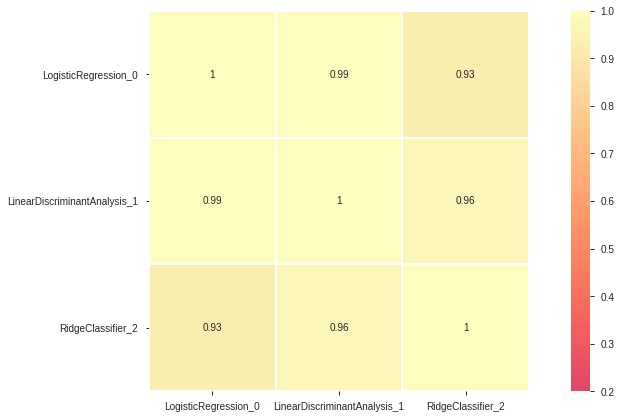

In [30]:
lda = create_model('lda')
ridge = create_model('ridge')
lr = create_model('lr')


# stack trained models
stacked_models = stack_models(estimator_list=[lr, lda, ridge ], 
                              plot = True, 
                              #finalize = True
                              )

In [31]:
pred_stacked = predict_model(stacked_models);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Stacking Classifier,0.8,0.7518,0.9843,0.7812,0.8711,0.4504


In [0]:
evaluate_model(stacked_models)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 7.2 Blending

In [32]:
#blend all models
blend_all = blend_models()

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8372,0.0,0.9667,0.8286,0.8923,0.5669
1,0.8140,0.0,1.0000,0.7895,0.8824,0.4658
2,0.8372,0.0,1.0000,0.8108,0.8955,0.5446
3,0.7907,0.0,0.8667,0.8387,0.8525,0.4928
4,0.7674,0.0,0.9333,0.7778,0.8485,0.3658
5,0.7674,0.0,0.9310,0.7714,0.8438,0.4044
6,0.7209,0.0,0.8966,0.7429,0.8125,0.2853
7,0.7674,0.0,0.9310,0.7714,0.8438,0.4044
8,0.7442,0.0,0.9655,0.7368,0.8358,0.3013
9,0.8333,0.0,0.8966,0.8667,0.8814,0.6016


In [33]:
pred_blend = predict_model(blend_all);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Voting Classifier,0.7946,0,0.9528,0.7908,0.8643,0.4566


In [0]:
evaluate_model(blend_all)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 8.0 Finalize Model

In [0]:
final_ = finalize_model(stacked_models)

# 9.0 Predict on unseen data

In [38]:
unseen_predictions = predict_model(final_, data=test)
unseen_predictions.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Label,Score
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1,0.7883
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1,0.7361
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1,0.8430
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1,0.8860
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1,0.6542


In [39]:
unseen_predictions.shape

(367, 14)

In [40]:
submission = unseen_predictions[['Loan_ID', 'Label']]
submission.columns = ['Loan_ID', 'Loan_Status']
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [41]:
submission.Loan_Status = submission.Loan_Status.map({ 0 : 'N',
                             1 : 'Y'})
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# 10.0 Submission file

In [0]:
submission.to_csv('solution.csv', index=False)